# COSC 311 Final Exam_Spring 2024 (Part II)

Time limit: 100 minutes

Note: You need to **copy and paste your source code into the Answer Area after each question on MyClasses**. In addition, you also need to **upload this Jupyter Notebook file (".ipynb") with all your source code and test results** to the last task of this exam on MyClasses.

### Question 1 (15 points):

Use the attached file named "SciencePaper.txt", write a Python program to analyze this file and answer the following questions.

Task 1: How many different words appeared in this paper?

Task 2: What are the 10 words that appear most frequently (from high to low)?

Task 3: What are the appearance frequencies for the following words?

-	Summerfelt

-	wastewater

-	greenhouse

-	salmon

Task 4: What are the words appear exactly 1 time, 2 times, 5 times, and 10 times, respectively?

Task 5: Draw a bar figure to show the average length of words for each appearance frequency.

Note: you may use **file = open('SciencePaper.txt', 'r', errors='ignore')** to open the file if there is encoding/decoding error.

In [101]:
from collections import Counter


file = open('SciencePaper.txt', 'r')
fileData = file.read()
words = fileData.upper().replace(',','').replace(';','').replace('(','').replace(')','')\
        .replace('!','').replace('?','').replace('.','').replace('“','').replace('‘','').split()
dictOfWords = []

wordCount = Counter(words)


print("Number of Words", len(wordCount))

for i in wordCount:
    dictOfWords.append((wordCount[i] ,i))

dictOfWords = sorted(dictOfWords, reverse = True)

print()
print("10 Most Common Words")
for i in dictOfWords[0:10]:
    print(i[1])


one = []
two = []
five = []
ten = []

print("Word Appears Once")
for i in dictOfWords:
    if i[0] == 1:
        one.append(i[1])
    if i[0] == 2:
        two.append(i[1])
    if i[0] == 5:
        five.append(i[1])
    if i[0] == 10:
        ten.append(i[1])

print("")

print("Words that Appear Once")
print(one)

print()
print("Words that Appear Twice")
print(two)

print()
print("Words that Appear five Times")
print(five)

print()
print("Words that Appear ten Times")
print(ten)



Number of Words 1152

10 Most Common Words
THE
TO
OF
AND
IN
A
SALMON
FISH
IS
THAT
Word Appears Once

Words that Appear Once
['ØYSTEIN', 'ÅSA', 'YOUNG', 'YOU', 'YONATHAN', 'WRAPPING', 'WORLDWIDE', 'WORLD', 'WORK”', 'WORKERS', 'WONG', 'WISCONSIN—WHEN', 'WINTER', 'WHOLE', 'WE’RE', 'WEST', 'WEEK', 'WEAKENING', 'WE', 'WATER—AND', 'WATERPROOF', 'WATER-BORNE', 'WASTES', 'WASTED', 'WASHINGTON', 'WANTED', 'WANDER', 'WALL', 'VIGOROUSLY', 'VIGOROUS', 'VIEWS', 'VIABLE', 'VAST', 'VARIANTS', 'VALUE', 'USES—WHICH', 'UNWILLING', 'UNWANTED', 'UNUSED', 'UNTREATED', 'UNORTHODOX', 'UNIVERSITIES', 'UNIT', 'UNIQUE', 'UNFERTILIZED', 'UNEATEN', 'UNDERNEATH', 'UNDERGROUND', 'ULTRAVIOLET', 'TYPICALLY', 'TURBIDITY', 'TRYING', 'TRUCKED', 'TROUBLE', 'TRICKY', 'TRIALS', 'TREATMENT', 'TREATED', 'TRAYS', 'TRANSLUCENT', 'TRANSFORM', 'TRADITIONALLY', 'TOWN', 'TOWER', 'TOUCH', 'TOSSED', 'TODD', 'TODAY', 'TITANIUM', 'TINY', 'TINKERER', 'TIGHTLY', 'THROUGH', 'THRIVE', 'THOSE', 'THIRD', 'THEY’VE', 'THEMSELVES”', 'THAT’S', 

### Question 2 (10 points):

Please use the "Housing Dataset" attached to finish the following tasks. **Each figure needs to show title, xlabel, and ylabel**.

Task 1: Draw a scatterplot figure to show the relationship between "total_bedrooms" and "median_house_value";

Task 2: Draw a bar figure to show the **maximum** "median_house_value" for each type of "ocean_proximity" (i.e. for 'NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', and 'ISLAND', respectively)

Task 3: Draw a histogram to show the "total_rooms" distribution in 8 bins for the "ISLAND" houses.


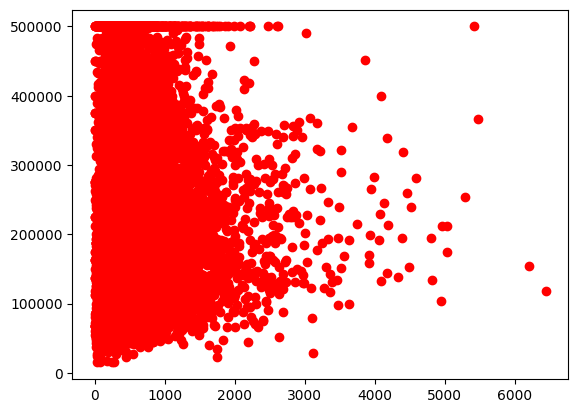

<class 'pandas.core.frame.DataFrame'>


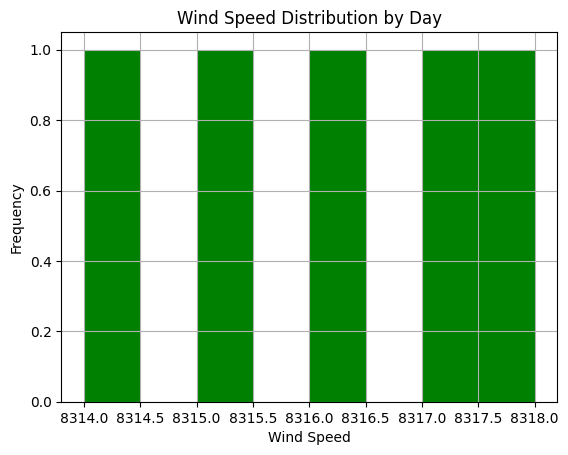

In [137]:
import pandas as pd
from matplotlib import pyplot as plt

housingData = pd.read_csv("housing.csv")



plt.scatter(housingData["total_bedrooms"], housingData["median_house_value"], color = "red")

plt.show()






listData = list(housingData['ocean_proximity'])

proxIndex = []

for i, j in enumerate(listData):
    if(j == 'ISLAND'):
        proxIndex.append(i)


values = []
for i in proxIndex:
    values.append(housingData['total_rooms'][i])


plot = pd.DataFrame(proxIndex).hist(bins =8, color = 'green')

plt.title("Wind Speed Distribution by Day")
plt.xlabel('Wind Speed')
plt.ylabel('Frequency')


plt.show()



### Question 3 (25 points):

Please use the "breast cancer dataset" included in the scikit-learn library to conduct the following classfication tasks. 

Task 1: Conduct PCA analysis on the dataset and find out how many principal components are needed to keep at least 95% variance (i.e. the ratio of variance loss, η, is less than 5%). Assume m principal components are needed, transform the dataset to m dimensions.

Task 2: Randomly split the **transformed** dataset into two parts: 70% for training and 30% for testing. Use KNN classification algorithm to conduct experiments and find out the most appropriate parameter for *k (1 <= k <= 15)*. You need to draw a figure to show the accuracies for different values of *k*; Use the best *k* value selected, show the testing results using **Classification Report** and draw the **confusion matrix (in a figure)**;  

Task 3: Use the **WHOLE transformed** dataset, conduct a 10-fold cross validation test using Decision Tree algorithm (parameter setting: criterion is "entropy", max-depth is 25) and SVC algorithm (parameter setting: C is 5, kernel is "rbf", gamma is 0.01), respectively. Show the **test accuracy** and draw the corresponding **confusion matrix (in a figure)** for each classifier; 

Task 4: Using the **WHOLE transformed** dataset, conduct k-means clustering (k = 2, i.e., malignant and benign), 1) output the corresponding center of each cluster; 2) output the **clustering accuracy** (i.e. out of all samples, how many samples are correctly identified); 3) show the corresponding **confusion matrix** in a figure.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
from sklearn.datasets import bre
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

iris = datasets.load_iris(as_frame = True)
iris_data = iris.frame
pca = PCA()

X = iris_data.iloc[:,:-1]
y = iris_data.iloc[:,-1]

X_new = pca.fit_transform(X)

